<br> 
<br>

## 1. Basic handling with SQLite3

<br> 
<br>

## 1-1. Import SQLite3

In [17]:
import sqlite3 # built-in library (Python 2.x & 3.x)

print(sqlite3.sqlite_version) # sqlite version
print(sqlite3.version) # pysqlite version

3.27.2
2.6.0


<br> 
<br>

## 1-2. Create connection & SQLite3 Cursor (a method of the connection object)

In [74]:
# 만드려는 Database 파일의 이름을 지정합니다.
dbpath = "maindb.db" # or "maindb.sqlite"

conn = sqlite3.?(dbpath) # Database 파일에 '연결'합니다.

# 1) conn.cursor()
# 2) conn.commit/rollback() <- conn.commit() : 저장 vs conn.rollback() : 마지막 commit 이후의 변경사항 모두 취소 
# 3) conn.close() 

In [ ]:
cur = conn.?() # 마우스 커서(cursor)와 같이 DB를 hovering하고 있다고 상상해주세요.

# cur.execute/executescript/executemany(), cur.fetchone/fetchall()

<br> 
<br>

## 1-3. Execute scripts with SQLite3 Cursor & Save the changes

<br> 
<br>

**Datatypes** in SQLite3 
@ https://www.sqlitetutorial.net/sqlite-data-types/ (한글 : https://araikuma.tistory.com/681)

- #### **NULL** : missing information or unknown.
- #### **INTEGER (or INT)** : Integer values are whole numbers (positive or negative). An integer can have variable sizes such as 1, 2,3, 4, or 8 bytes.
- #### **REAL** : a floating point value, real numbers with decimal values that use 8-byte floats.
- #### **TEXT (or VARCHAR)** : a text string, SQLite supports various character encodings. (UTF-8, UTF-16BE or UTF-16LE)
- #### **BLOB** : stands for a binary large object that can store any kind of data. 

<br>

Field의 Datatype을 지칭하는 이름은 DBMS의 종류별로 대동소이합니다.
<br>
ex) Datatypes in MySQL @ https://dev.mysql.com/doc/refman/8.0/en/data-types.html & http://blog.naver.com/islove8587/221036036689

In [ ]:
# 아래와 같이 한 줄로 작성할 수도 있으나 가시성/유지보수를 고려해 멀티라인으로 작성합니다.

# cur.execute("CREATE TABLE employees(id INTEGER PRIMARY KEY, name TEXT NOT NULL, salary REAL, department TEXT, position TEXT, hireDate TEXT)")
# con.commit()

In [75]:
script = """
-- 1) employees 테이블이 이미 있다면 제거
DROP TABLE IF EXISTS employees;

-- 2) employees 테이블 생성 
CREATE TABLE employees( 
id INTEGER PRIMARY KEY AUTOINCREMENT, --숫자를 저장, 이 테이블의 주요 Key(기본 키)로 지정, 값을 따로 입력하지 않으면 자동 증가 숫자 부여
name TEXT NOT NULL, --빈 값이 저장되는 것을 허용하지 않음
salary REAL, --소수점이 들어간 자료형
department TEXT,
position TEXT,
hireDate TEXT);

-- 3) employees 테이블에 데이터(row == record == instance) 넣기
-- Format) INSERT INTO 테이블명(필드명, 필드명, ...) VALUES(실제값, 실제값, ...) <- 지정한 필드의 수와 넣어주는 값의 갯수가 동일해야 함
INSERT INTO employees(name, salary, department, position, hireDate) VALUES('Dave', 300, 'Marketing', 'LV1', '2020-01-01');
INSERT INTO employees(name, salary, department, position, hireDate) VALUES('Clara', 420, 'Sales', 'LV2', '2018-01-11');
INSERT INTO employees(id, name, salary, department, position, hireDate) VALUES(3, 'Jane', 620, 'Developer', 'LV4', '2015-11-01');
-- 전체 필드에 빠짐없이 값을 넣을 시 필드명 생략 가능 
INSERT INTO employees VALUES(4, 'Peter', 530, 'Developer', 'LV2', '2020-11-01'); 
"""

cur.?(script) # 여러개의 SQL 명령어를 한 장의 "Script"처럼 한번에 실행합니다.
conn.?() # connect -> commit/rollback -> close, 실제로 DB에 위 Table & Data를 저장합니다.

In [69]:
data = [('Elena', 510, 'Recruiter', 'LV3', '2020-07-01'), 
        ('Sujan', 710, 'HR', 'LV5', '2014-06-01'),
        ('Jake', 210, 'CEO', 'LV8', '2012-01-01')]

# 많은("many") 데이터를 한번에 INSERT/UPDATE/DELETE 합니다. 
cur.?("INSERT INTO employees(name, salary, department, position, hireDate) VALUES(?, ?, ?, ?, ?);", data)
conn.?()

In [ ]:
cur.?("SELECT * FROM employees;") # 단 하나의 SQL 문을 실행("execute")합니다.

employee_list = cur.?() # fetchall or fetchone

for employee in employee_list:
    print(employee)

In [71]:
# Checking column names with fetched data

print([col[0] for col in cur.?]) # "Description" of the table
# print(cur.description) # https://j.mp/3f2xc6l

['id', 'name', 'salary', 'department', 'position', 'hireDate']


In [65]:
import pandas as pd

df = pd.?("SELECT * FROM employees;", ?) # 현재 연결(connect)되어있는 DB로부터 "SQL Query"를 활용해 데이터를 읽어들입니다.
df

# 세미콜론(;)이 빠져도 실행은 되지만, 추후 문법 상 오류가 발생하지 않도록 최대한 세미콜론을 꼭 붙여주도록 하겠습니다.

id   name  salary department position    hireDate
0   1   Dave   300.0  Marketing      LV1  2020-01-01
1   2  Clara   420.0      Sales      LV2  2018-01-11
2   3   Jane   620.0  Developer      LV4  2015-11-01
3   4  Elena   510.0  Recruiter      LV3  2020-07-01
4   5  Sujan   710.0         HR      LV5  2014-06-01
5   6   Jake   210.0        CEO      LV8  2012-01-01

<br> 
<br>

## 1-4. Closing connection of SQLite3 
: 연결을 Close 해주어야 DB 파일인 .sqlite 파일의 삭제 등이 가능합니다.

In [21]:
conn.?() # connect -> commit/rollback -> close

<br> 
<br>

## 1-5. Browsing DB tables with [ DB Browser for SQLite ]

- Installer download @ https://github.com/sqlitebrowser/sqlitebrowser
- We will use [ DB Browser for SQLite - **.zip (no installer)** for 64-bit Windows ] 
- Unzip the .zip file & execute **"DB Browser for SQLite.exe"**

<hr>

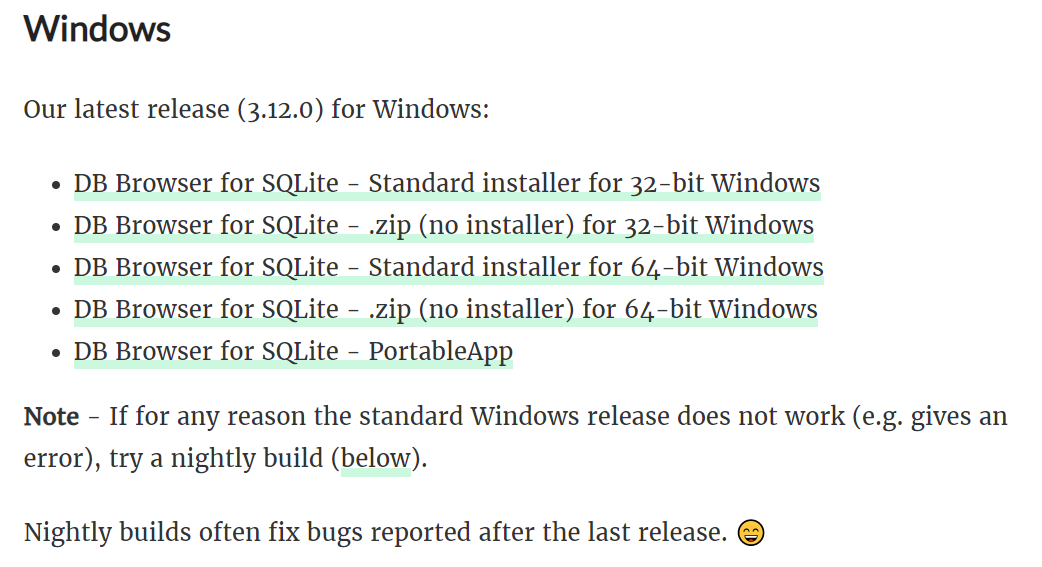

<hr>




<br>
<hr>



<br>
<hr>

<br> 
<br>

## 2. DDL (Data Definition Language, 데이터 정의 언어) 

<br>

- 각 릴레이션(데이터베이스 테이블)을 정의하기 위해 사용하는 언어
- **CREATE** (테이블 생성) / **ALTER** (테이블 변경) / **DROP** (테이블 삭제) 등

<br>
<br>

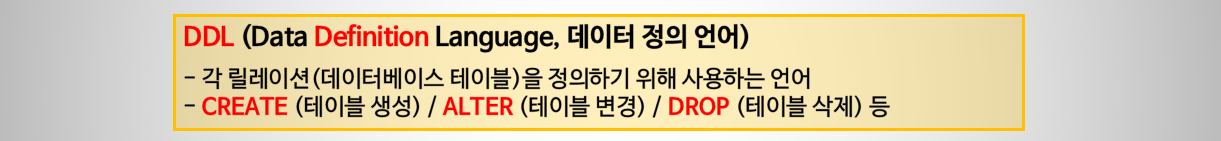

<br>
<br>

In [35]:
import pandas as pd
import sqlite3 # built-in library (Python 2.x & 3.x)

dbpath = "maindb_2.db" # or "maindb_2.sqlite"
conn = sqlite3.connect(dbpath)
cur = conn.cursor() 

# conn.cursor(), conn.commit/rollback(), conn.close() <- conn.commit() : 저장 vs conn.rollback() : 마지막 commit 이후의 변경사항 모두 취소 
# cur.execute/executescript/executemany(), cur.fetchone/fetchall()

<br>

### CREATE Table

<br>

- SQLite **Data Types** @ https://www.sqlitetutorial.net/sqlite-data-types/
<br>

- SQLite **Primary Key** @ https://www.sqlitetutorial.net/sqlite-primary-key/ 

- SQLite **AUTOINCREMENT** (not required/recommended always) @ https://www.sqlitetutorial.net/sqlite-autoincrement/ 

- SQLite **NOT NULL** Constraint @ https://www.sqlitetutorial.net/sqlite-not-null-constraint/

- SQLite **CHECK** Constraint @ https://www.sqlitetutorial.net/sqlite-check-constraint/

- SQLite **UNIQUE** Constraint @ https://www.sqlitetutorial.net/sqlite-unique-constraint/
  <br>(SQLite treats all NULL values are different, therefore, **a column with a UNIQUE constraint can have multiple NULL values**)


In [ ]:
# CREATE TABLE IF NOT EXISTS contacts( 

script = """
CREATE TABLE contacts ( 
    contact_id INTEGER PRIMARY KEY,
    likes INTEGER DEFAULT 0, --값이 입력되지 않을 시 디폴트로 0을 저장합니다.
    first_name TEXT NOT NULL,
    last_name TEXT NOT NULL,
    email TEXT NOT NULL UNIQUE, --중복된 값이 입력될 경우 에러를 일으킵니다.
    phone TEXT NOT NULL UNIQUE CHECK (length(phone) >= 10) -- 길이가 10 이상이 아닐 경우 에러를 일으킵니다.
);
""" 
# 아래와 같이 먼저 contact_id 필드를 생성한 후, 사후적으로 Primary key로 지정이 가능합니다. 
# CREATE TABLE contacts (
#     contact_id INTEGER,
#     ~~~
#     PRIMARY KEY (contact_id)
# );

cur.execute(script) 

In [49]:
script = """
SELECT * FROM contacts;
""" 

df = pd.read_sql_query(script, conn)
df

Empty DataFrame
Columns: [contact_id, likes, first_name, last_name, email, phone]
Index: []

In [ ]:
script = """
CREATE TABLE groups (
   group_id INTEGER PRIMARY KEY AUTOINCREMENT,
   name TEXT NOT NULL
);
""" 

cur.execute(script) 

In [51]:
script = """
SELECT * FROM groups;
""" 

df = pd.read_sql_query(script, conn)
df

Empty DataFrame
Columns: [group_id, name]
Index: []

In [ ]:
# SQLite Foreign Key constraint in detail @ https://www.sqlitetutorial.net/sqlite-foreign-key/

script = """
CREATE TABLE contact_groups(
   contact_id INTEGER,
   group_id INTEGER,
   PRIMARY KEY (contact_id, group_id), 
   FOREIGN KEY (contact_id) 
      REFERENCES contacts(contact_id) -- contacts 테이블의 contact_id 필드를 참조하여 이 테이블의 contact_id 필드를 생성합니다.
         ON DELETE CASCADE, -- 참조하고 있는 contact 테이블의 contact_id 값이 삭제되면 이에 따라 자동으로 이 테이블에서도 삭제됩니다.
   FOREIGN KEY (group_id) 
      REFERENCES groups(group_id)
         ON DELETE CASCADE
);
""" 

cur.execute(script) 

In [53]:
script = """
SELECT * FROM contact_groups;
""" 

df = pd.read_sql_query(script, conn)
df.head()

Empty DataFrame
Columns: [contact_id, group_id]
Index: []

<br>

### ALTER Table
- Rename a table.
- Rename a column.
- Add a new column to a table.

In [40]:
script = """
CREATE TABLE devices (
   name TEXT NOT NULL,
   model TEXT NOT NULL,
   Serial INTEGER NOT NULL UNIQUE
);
""" 
cur.execute(script) 

script = """
INSERT INTO devices (name, model, serial)
VALUES('HP ZBook 17 G3 Mobile Workstation','ZBook','SN-2015');
""" 
cur.execute(script) 

script = """
SELECT * FROM devices;
""" 

df = pd.read_sql_query(script, conn)
df.head()

name  model   Serial
0  HP ZBook 17 G3 Mobile Workstation  ZBook  SN-2015

In [41]:
script = """
ALTER TABLE devices
RENAME TO equipment; -- devices 테이블의 이름을 equipment로 바꿉니다.
""" 
cur.execute(script) 

# devices -> equipment
script = """
SELECT * FROM equipment;
""" 

df = pd.read_sql_query(script, conn)
df.head()

name  model   Serial
0  HP ZBook 17 G3 Mobile Workstation  ZBook  SN-2015

In [42]:
script = """
ALTER TABLE equipment 
ADD COLUMN location text; -- 명령어를 주목해주세요. ('FIELD'가 아니라 'COLUMN'을 사용)
""" 
cur.execute(script) 

script = """
SELECT * FROM equipment;
""" 

df = pd.read_sql_query(script, conn)
df.head()

name  model   Serial location
0  HP ZBook 17 G3 Mobile Workstation  ZBook  SN-2015     None

In [43]:
script = """
ALTER TABLE equipment 
RENAME COLUMN location TO loc;
""" 
cur.execute(script) 

script = """
SELECT * FROM equipment;
""" 

df = pd.read_sql_query(script, conn)
df.head()

name  model   Serial   loc
0  HP ZBook 17 G3 Mobile Workstation  ZBook  SN-2015  None

<br>

### DROP Table

In [44]:
# DROP TABLE IF EXISTS equipment( 

script = """
DROP TABLE equipment ;
""" 
cur.execute(script) 

script = """
SELECT * FROM equipment;
""" 

df = pd.read_sql_query(script, conn)
df.head()

# DatabaseError occurs (no such table: equipment)

DatabaseError: Execution failed on sql '
SELECT * FROM equipment;
': no such table: equipment

<br> 
<br>

## 3. DB 내의 Table 목록 & Table structure 확인하기

<br>

\+ (Appendix) SQLite **Dump Command** (backup & restore) @ https://www.sqlitetutorial.net/sqlite-dump/

In [54]:
script = """
SELECT 
    name
FROM 
    sqlite_master 
WHERE -- 이하 내용은 다음 실습들에서 배울 예정입니다.
    type ='table' AND 
    name NOT LIKE 'sqlite_%'; 
""" 

df = pd.read_sql_query(script, conn)
df

name
0       employees
1         devices
2        contacts
3          groups
4  contact_groups

In [55]:
script = """
SELECT sql 
FROM sqlite_master 
WHERE name = 'contacts';
""" 

df = pd.read_sql_query(script, conn)
print(df['sql'][0])

CREATE TABLE contacts (
    contact_id INTEGER PRIMARY KEY,
    likes INTEGER DEFAULT 0,
    first_name TEXT NOT NULL,
    last_name TEXT NOT NULL,
    email TEXT NOT NULL UNIQUE,
    phone TEXT NOT NULL UNIQUE CHECK (length(phone) >= 10) 
)


In [77]:
conn.close()